ML Project Practice as part of Python for Machine Learning and Data Science MasterClass 2021 (Jose Portilla)

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

Precense of heart disease in the patient with value 0 as absence and the others as presence. There are 14 features recorded from the patients to predict heart disease.

Features:
- age
- sex
- cp : chest pain type (4 values)
- trestbps : resting blood pressure
- chol : serum cholestoral in mg/dl
- fbs : fasting blood sugar > 120 mg/dl
- restecg : resting electrocardiographic results (values 0,1,2)
- thalach : maximum heart rate achieved
- exang : exercise induced angina
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
- ca : number of major vessels (0-3) colored by flourosopy
- thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
- target : 0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [3]:
df = pd.read_csv('02_Heart_Disease_Data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis (EDA)

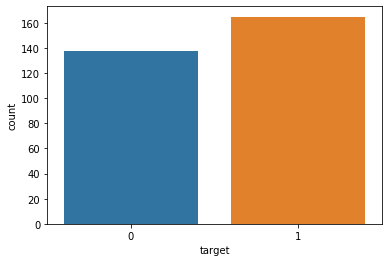

In [8]:
# Distribution of Target Variable for Each Class

sns.countplot(df['target'])

Balanced number of observations from each class

### Distributions

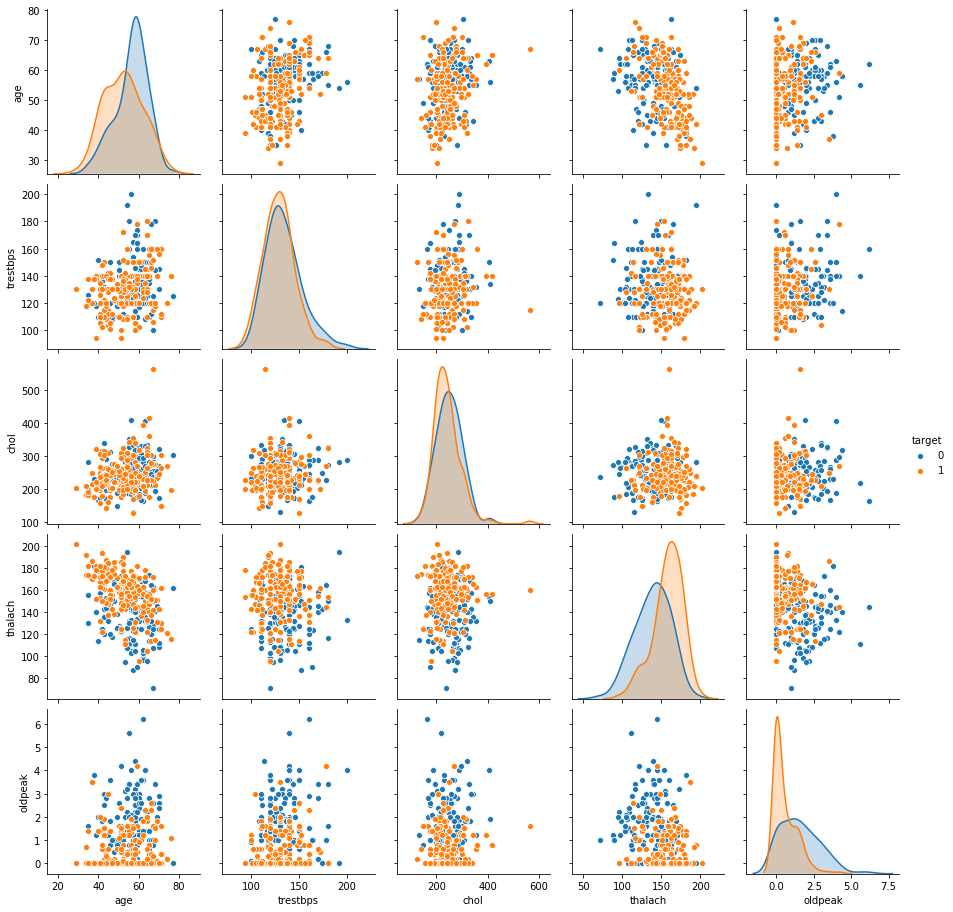

In [11]:
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']], hue='target')

In terms of trestbps and chol, absence and presence class showed quite large overlap distribution between each other

### Correlations

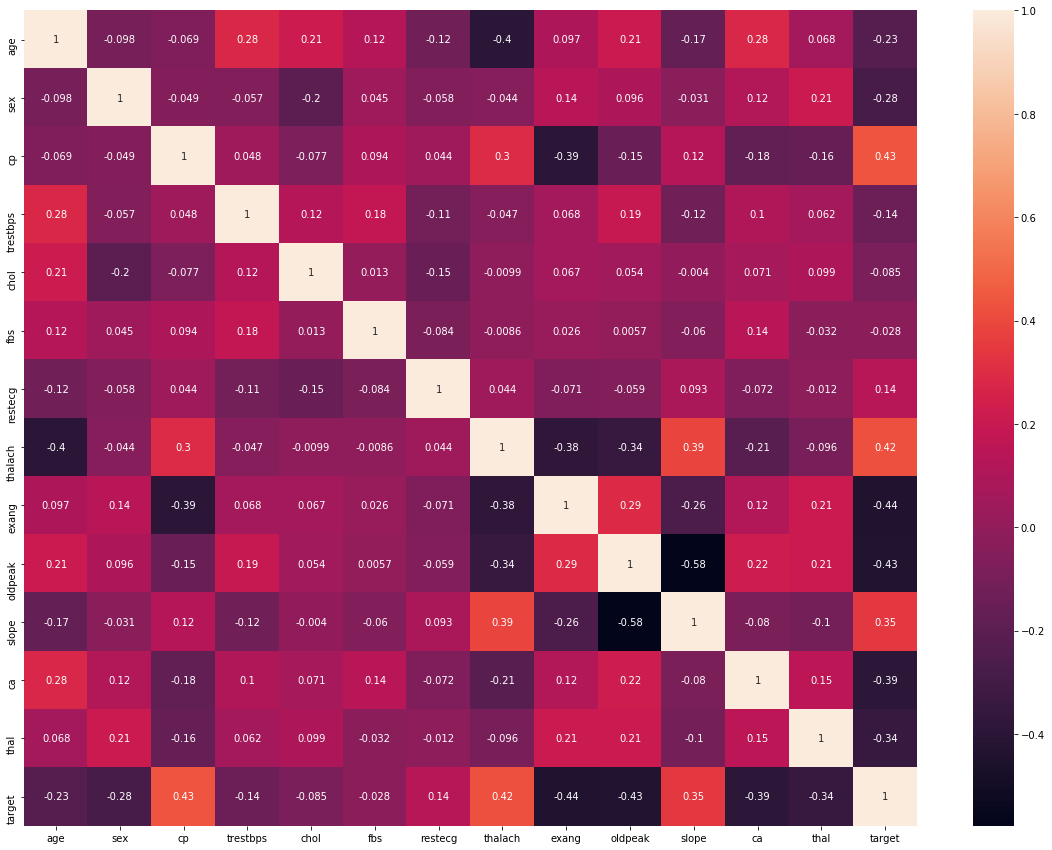

In [16]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(), annot=True)

All features only showed small until moderate correlation magnitude, the highest correlation found between oldpeak and slope with -0.58

# Logistics Regression

### Train and Test | Scaling

In [18]:
X = df.drop('target',axis=1)
y = df['target']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Model

In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Define Hyper-Parameters Grid

penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0, 3, 10)

In [28]:
grid_model = GridSearchCV(log_model, param_grid={'C':C,'penalty':penalty})
grid_model.fit(scaled_X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", 

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [29]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [32]:
grid_model.best_estimator_

LogisticRegression(max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [33]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003424,0.001008,0.000634,0.000207,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.836364,0.818182,0.833333,0.759259,0.925926,0.834613,0.053462,1
1,0.002084,0.000541,0.000378,0.000051,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.800000,0.818182,0.833333,0.759259,0.907407,0.823636,0.048671,20
2,0.000329,0.000090,0.000000,0.000000,1,elasticnet,"{'C': 1.0, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
3,0.001868,0.000197,0.000321,0.000034,2.15443,l1,"{'C': 2.154434690031884, 'penalty': 'l1'}",0.800000,0.818182,0.833333,0.759259,0.925926,0.827340,0.055175,3
4,0.001896,0.000135,0.000361,0.000103,2.15443,l2,"{'C': 2.154434690031884, 'penalty': 'l2'}",0.800000,0.818182,0.833333,0.777778,0.907407,0.827340,0.044124,3
5,0.000279,0.000038,0.000000,0.000000,2.15443,elasticnet,"{'C': 2.154434690031884, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
6,0.001760,0.000080,0.000317,0.000043,4.64159,l1,"{'C': 4.641588833612778, 'penalty': 'l1'}",0.800000,0.818182,0.833333,0.777778,0.925926,0.831044,0.050940,2
7,0.001656,0.000079,0.000296,0.000006,4.64159,l2,"{'C': 4.641588833612778, 'penalty': 'l2'}",0.800000,0.818182,0.814815,0.777778,0.925926,0.827340,0.051310,3
8,0.000241,0.000003,0.000000,0.000000,4.64159,elasticnet,"{'C': 4.641588833612778, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
9,0.001859,0.000099,0.000313,0.000019,10,l1,"{'C': 10.0, 'penalty': 'l1'}",0.800000,0.818182,0.814815,0.777778,0.925926,0.827340,0.051310,3


### Coefficient Interpretation

In [50]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000,C=1,penalty="l1")

In [51]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=1, max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [52]:
log_model.coef_

array([[-0.0478688 , -0.69646711,  0.88803535, -0.2390851 , -0.18647484,
         0.00232671,  0.096081  ,  0.42189758, -0.40862184, -0.52461158,
         0.35762276, -0.832299  , -0.56450858]])

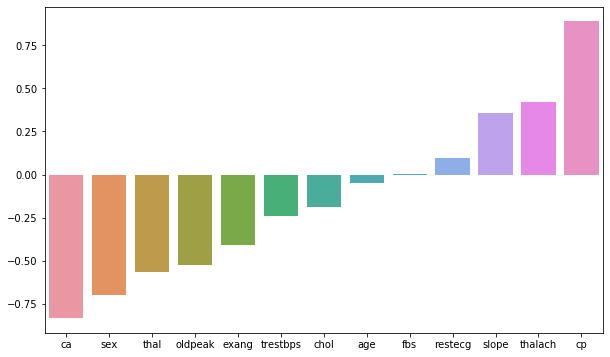

In [53]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

Interpretation:
    - Number of presence decreasing when features with beta coef negative increasing
    - Number of presence increasing when features with beta coef positive increasing
    - fbs, restecg and age showed small effect in determining heart disease presence

### Model Performance

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [54]:
y_pred = log_model.predict(scaled_X_test)

In [55]:
# Accuracy Score

accuracy_score(y_test,y_pred)

0.8387096774193549

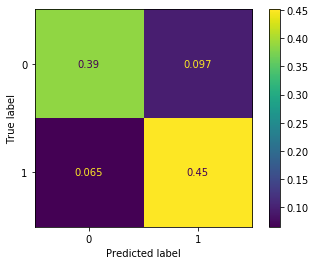

In [56]:
# Confusion Matrix

plot_confusion_matrix(grid_model,scaled_X_test,y_test, normalize='all')

In [57]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

In [58]:
# Classification Matrix Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### AUC Curves Evaluation

In [59]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

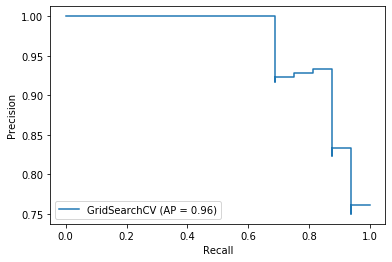

In [60]:
plot_precision_recall_curve(grid_model,scaled_X_test,y_test)

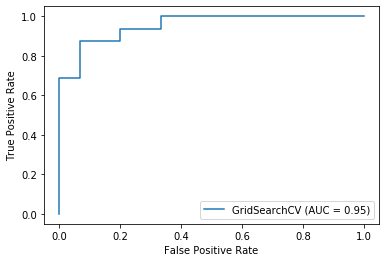

In [61]:
plot_roc_curve(grid_model,scaled_X_test,y_test)

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [63]:
# Precision Score

precision_score(y_test,y_pred)

0.8235294117647058

In [64]:
# Recall Score

recall_score(y_test,y_pred)

0.875

In [65]:
# F1 Score

f1_score(y_test,y_pred)

0.8484848484848485